In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

diab_df= pd.read_csv("C:\\Users\\divya\\Desktop\\diabetes.csv")

In [4]:
#Checking first 5 reecords from the datasets
print(diab_df.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
#Checking last 5 records from the datasets
print(diab_df.tail(5))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  


In [6]:
#check the duplicate data in dataset
diab_df.duplicated().sum()

0

In [7]:
#checks the shape of the DataFrame in dataset
diab_df.shape


(768, 9)

In [8]:
# checks the non-null values in each column
diab_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#Data Preparation
diab_df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
diab_df.hist(figsize = (11,11), color="#800080")

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

In [11]:
#replace NaN values for the columns in accordance with their distribution
diab_df['Glucose'].fillna(diab_df['Glucose'].mean(), inplace = True)
diab_df['BloodPressure'].fillna(diab_df['BloodPressure'].mean(), inplace = True)
diab_df['SkinThickness'].fillna(diab_df['SkinThickness'].median(), inplace = True)
diab_df['Insulin'].fillna(diab_df['Insulin'].median(), inplace = True)
diab_df['BMI'].fillna(diab_df['BMI'].median(), inplace = True)

diab_df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
diab_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
#EDA
#Bar chart
plt.figure(figsize=(10,5))
plt.title('Diabetes Plot Yes/No', fontsize=14)
sns.countplot(x="Outcome", data=diab_df, palette=('#FFFF00','#800080'))
plt.xlabel("Diabetes (0 = No, 1= Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Text(0.5, 1.0, 'Diabetes Outcome vs Age')

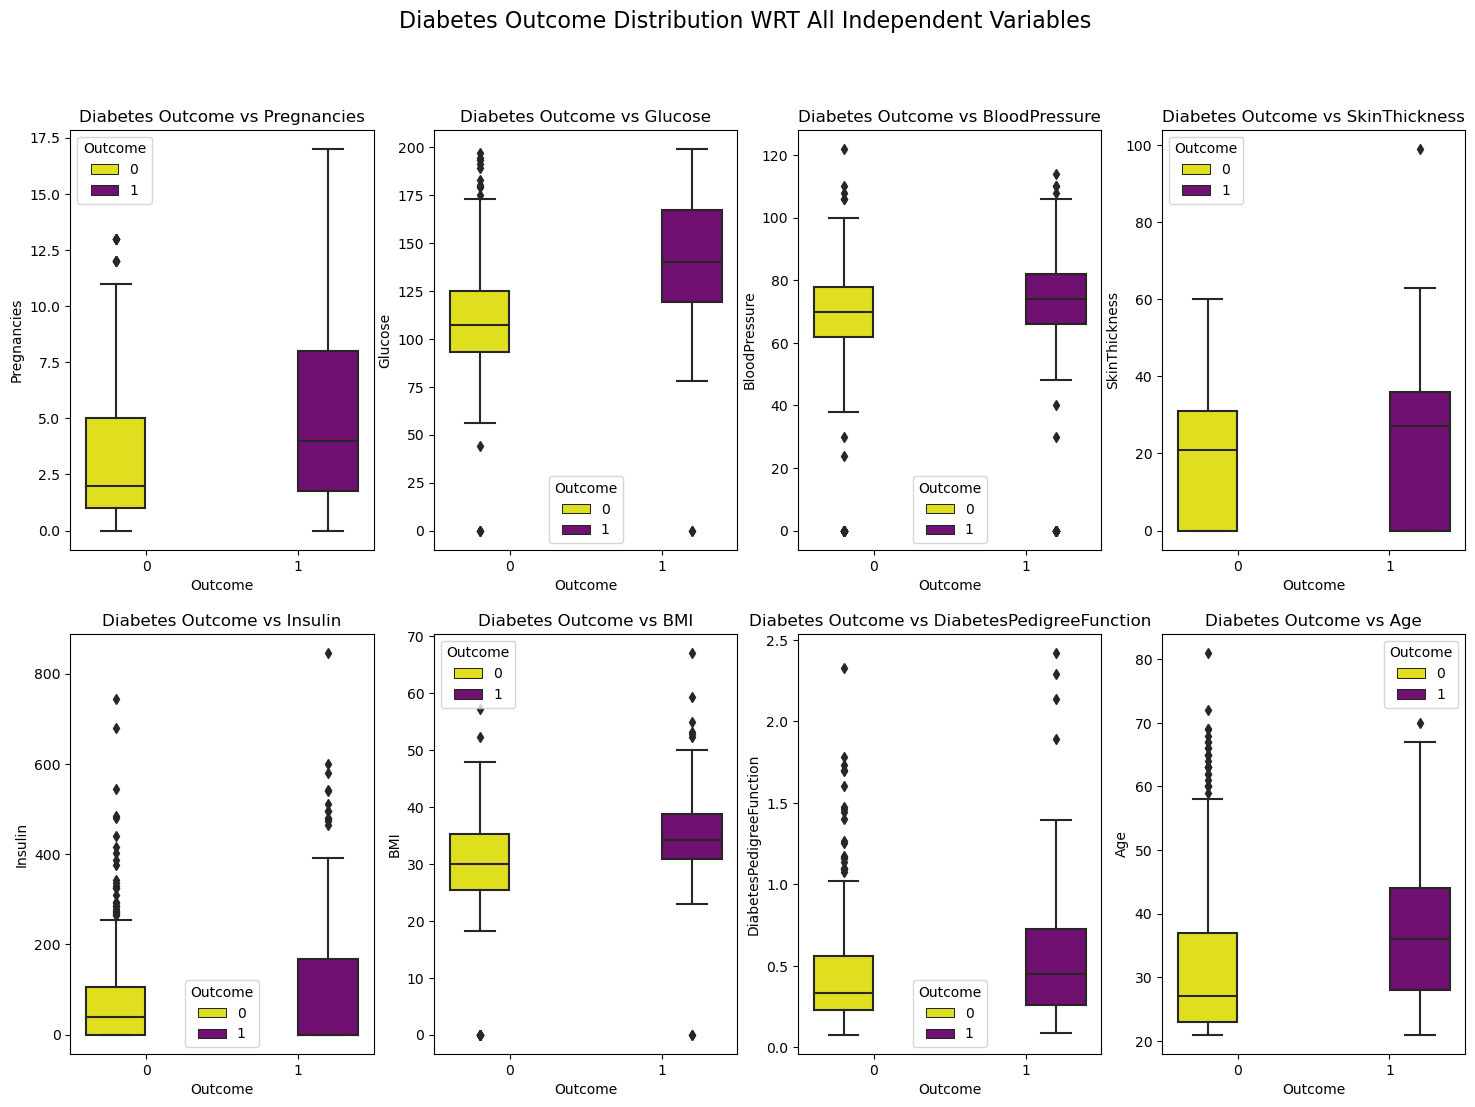

In [14]:
#box plot
fig, axes = plt.subplots(2, 4, figsize=(18, 12))
fig.suptitle(
    'Diabetes Outcome Distribution WRT All Independent Variables', fontsize=16)
 
sns.boxplot(ax=axes[0, 0], x=diab_df['Outcome'], y=diab_df['Pregnancies'],
            hue=diab_df['Outcome'], palette=('#FFFF00', '#800080'))
axes[0, 0].set_title("Diabetes Outcome vs Pregnancies", fontsize=12)
 
sns.boxplot(ax=axes[0, 1], x=diab_df['Outcome'], y=diab_df['Glucose'],
            hue=diab_df['Outcome'], palette=('#FFFF00', '#800080'))
axes[0, 1].set_title("Diabetes Outcome vs Glucose", fontsize=12)
 
sns.boxplot(ax=axes[0, 2], x=diab_df['Outcome'], y=diab_df['BloodPressure'],
            hue=diab_df['Outcome'], palette=('#FFFF00', '#800080'))
axes[0, 2].set_title("Diabetes Outcome vs BloodPressure", fontsize=12)
 
sns.boxplot(ax=axes[0, 3], x=diab_df['Outcome'], y=diab_df['SkinThickness'],
            hue=diab_df['Outcome'], palette=('#FFFF00', '#800080'))
axes[0, 3].set_title("Diabetes Outcome vs SkinThickness", fontsize=12)
 
sns.boxplot(ax=axes[1, 0], x=diab_df['Outcome'], y=diab_df['Insulin'],
            hue=diab_df['Outcome'], palette=('#FFFF00', '#800080'))
axes[1, 0].set_title("Diabetes Outcome vs Insulin", fontsize=12)
 
sns.boxplot(ax=axes[1, 1], x=diab_df['Outcome'], y=diab_df['BMI'],
            hue=diab_df['Outcome'], palette=('#FFFF00', '#800080'))
axes[1, 1].set_title("Diabetes Outcome vs BMI", fontsize=12)
 
sns.boxplot(ax=axes[1, 2], x=diab_df['Outcome'], y=diab_df['DiabetesPedigreeFunction'],
            hue=diab_df['Outcome'], palette=('#FFFF00', '#800080'))
axes[1, 2].set_title(
    "Diabetes Outcome vs DiabetesPedigreeFunction", fontsize=12)
 
sns.boxplot(ax=axes[1, 3], x=diab_df['Outcome'], y=diab_df['Age'],
            hue=diab_df['Outcome'], palette=('#FFFF00', '#800080'))
axes[1, 3].set_title("Diabetes Outcome vs Age", fontsize=12)

In [16]:
#pairplot
sns.pairplot(diab_df, hue='Outcome', palette=('#FFFF00', '#800080'))

C:\Users\divya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [17]:
#correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(diab_df.corr(), annot=True, cmap='PiYG')
plt.title("Feature Correlation Matrix",fontsize=20)
plt.show()


In [18]:
#Modelling Building
print(diab_df.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [19]:
#counts the number of occurrences of each unique value in the ‘Outcome’ column of the DataFrame diab_df
diab_df['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

In [20]:
#Train the model
from sklearn.model_selection import train_test_split
x = diab_df.drop(['Outcome'],axis=1)
y = diab_df['Outcome']
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_scaled= sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.3, random_state=0)
x_train.shape, y_train.shape

((537, 8), (537,))

In [21]:
#testing the data
x_test.shape, y_test.shape


((231, 8), (231,))

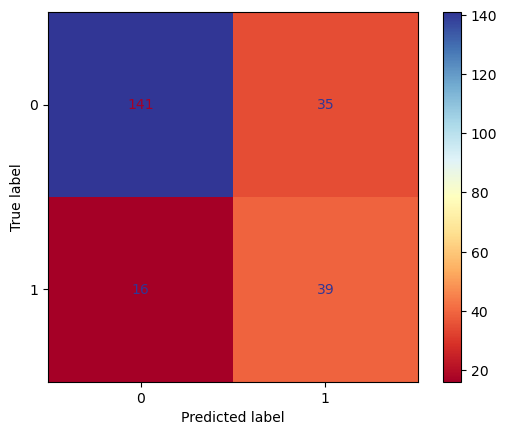

In [22]:
#Applying Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
confmat = confusion_matrix(y_pred, y_test)
confmat

from sklearn import metrics
cm = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_pred, y_test, labels=logreg.classes_),
display_labels=logreg.classes_)
cm.plot(cmap="RdYlBu")


In [23]:
#calculates the accuracy score of a classification model
accuracy_score(y_pred, y_test)


0.7792207792207793